In [1]:
import pandas as pd,numpy as np
train_data = pd.read_csv(r'C:\Users\sadiq\Documents\AnalyticVidhya\train.csv')
test_data = pd.read_csv(r'C:\Users\sadiq\Documents\AnalyticVidhya\test.csv')

In [2]:
train_data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [3]:
train_data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [4]:
train_data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [5]:
train_data.shape

(550068, 12)

In [6]:
train_data.groupby('Gender')['Purchase'].sum().plot(kind='bar')

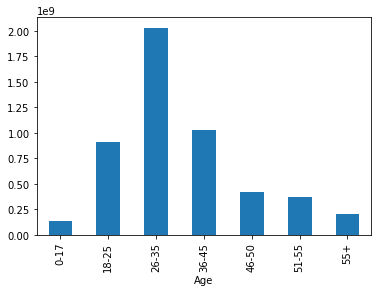

In [7]:
train_data.groupby('Age')['Purchase'].sum().plot(kind='bar')

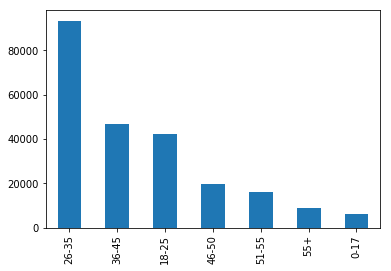

In [8]:
test_data['Age'].value_counts().plot(kind='bar')

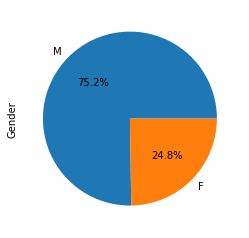

In [9]:
test_data['Gender'].value_counts().plot(kind='pie',autopct = '%1.1f%%')

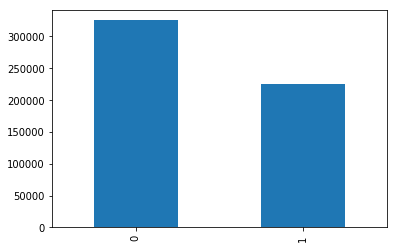

In [10]:
train_data['Marital_Status'].value_counts().plot(kind='bar')

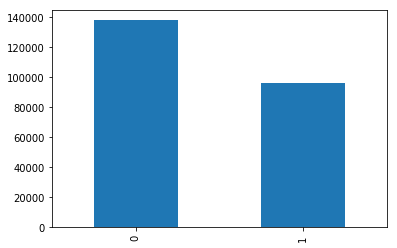

In [11]:
test_data['Marital_Status'].value_counts().plot(kind='bar')

In [12]:
test_data.shape

(233599, 11)

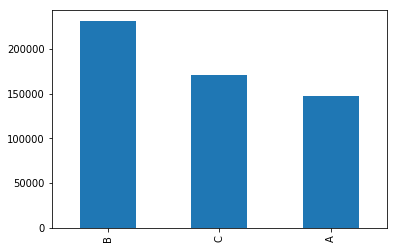

In [13]:
train_data['City_Category'].value_counts().plot(kind='bar')

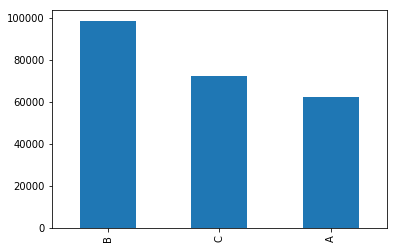

In [14]:
test_data['City_Category'].value_counts().plot(kind='bar')

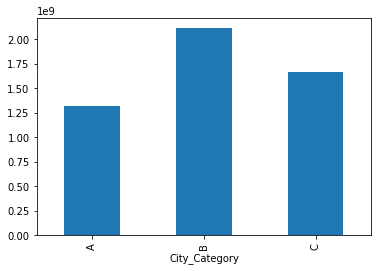

In [15]:
train_data.groupby('City_Category')['Purchase'].sum().plot(kind='bar')

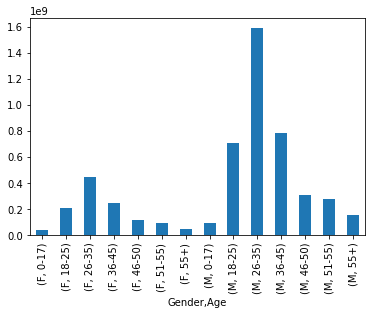

In [16]:
train_data.groupby(['Gender','Age'])['Purchase'].sum().plot(kind='bar')

In [17]:
test_data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix,r2_score
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)

In [19]:
train_data.drop(['User_ID','Product_ID','Marital_Status'],1,inplace=True)

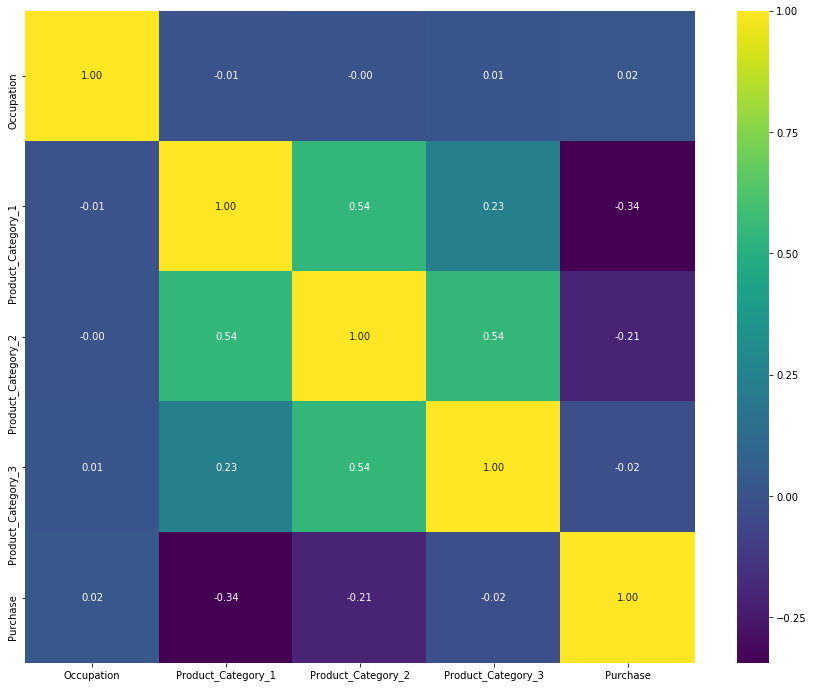

In [20]:
plt.figure(figsize=(15,12))
sns.heatmap(train_data.corr(), cmap='viridis', annot=True, fmt='.2f')

In [21]:
test_data.drop(['User_ID','Product_ID','Marital_Status'],1,inplace=True)

In [22]:
gender = pd.get_dummies(train_data['Gender'])
gender.head()

,F,M
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


In [23]:
train_data= pd.concat([train_data, gender], axis=1)
train_data.drop(['Gender'],1,inplace=True)
train_data.head()

,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,F,M
0,0-17,10,A,2,3,NaN,NaN,8370,1,0
1,0-17,10,A,2,1,6.0,14.0,15200,1,0
2,0-17,10,A,2,12,NaN,NaN,1422,1,0
3,0-17,10,A,2,12,14.0,NaN,1057,1,0
4,55+,16,C,4+,8,NaN,NaN,7969,0,1


In [ ]:
City= pd.get_dummies(train_data['City_Category'])
train_data= pd.concat([train_data, City], axis=1)
train_data.drop(['City_Category'],1,inplace=True)
train_data.head()

,Age,Occupation,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,F,M,A,B,C
0,0-17,10,2,3,NaN,NaN,8370,1,0,1,0,0
1,0-17,10,2,1,6.0,14.0,15200,1,0,1,0,0
2,0-17,10,2,12,NaN,NaN,1422,1,0,1,0,0
3,0-17,10,2,12,14.0,NaN,1057,1,0,1,0,0
4,55+,16,4+,8,NaN,NaN,7969,0,1,0,0,1


In [ ]:
Age= pd.get_dummies(train_data['Age'])
train_data= pd.concat([train_data, Age], axis=1)
train_data.drop(['Age'],1,inplace=True)
train_data.head()

,Occupation,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,F,M,A,B,C,0-17,18-25,26-35,36-45,46-50,51-55,55+
0,10,2,3,NaN,NaN,8370,1,0,1,0,0,1,0,0,0,0,0,0
1,10,2,1,6.0,14.0,15200,1,0,1,0,0,1,0,0,0,0,0,0
2,10,2,12,NaN,NaN,1422,1,0,1,0,0,1,0,0,0,0,0,0
3,10,2,12,14.0,NaN,1057,1,0,1,0,0,1,0,0,0,0,0,0
4,16,4+,8,NaN,NaN,7969,0,1,0,0,1,0,0,0,0,0,0,1


In [ ]:
Stay= pd.get_dummies(train_data['Stay_In_Current_City_Years'])
train_data= pd.concat([train_data, Stay], axis=1)
train_data.drop(['Stay_In_Current_City_Years'],1,inplace=True)
train_data.head()

,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,F,M,A,B,C,0-17,18-25,26-35,36-45,46-50,51-55,55+,0,1,2,3,4+
0,10,3,NaN,NaN,8370,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,10,1,6.0,14.0,15200,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,10,12,NaN,NaN,1422,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,10,12,14.0,NaN,1057,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,16,8,NaN,NaN,7969,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1


In [ ]:
train_data['Product_Category_2'] = train_data['Product_Category_2'].replace('', np.nan)
train_data['Product_Category_3'] = train_data['Product_Category_3'].replace('', np.nan)

In [ ]:
train_data['Product_Category_2'] = train_data['Product_Category_2'].replace(np.nan,train_data['Product_Category_2'].median())
train_data['Product_Category_3'] = train_data['Product_Category_3'].replace(np.nan,train_data['Product_Category_3'].median())
train_data['Product_Category_3'].isnull()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
550038    False
550039    False
550040    False
550041    False
550042    False
550043    False
550044    False
550045    False
550046    False
550047    False
550048    False
550049    False
550050    False
550051    False
550052    False
550053    False
550054    False
550055    False
550056    False
550057    False
550058    False
550059    False
550060    False
550061    False
550062    False
550063    False
550064    False
550065    False
550066    False
550067    False
Name: Product_Category_3

In [ ]:
X = train_data.drop('Purchase',1)
y = train_data['Purchase']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred=lin_reg.predict(X_test)
print("Linear Regression RMSE Value : ",np.sqrt(mean_squared_error(y_pred,y_test)))

Linear Regression RMSE Value :  4700.651910009559


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print("Random Forest RMSE Value : ",np.sqrt(mean_squared_error(y_pred,y_test)))

Random Forest RMSE Value :  3044.2692923346126


In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
# fit and predict
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
# calculate RMSE
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
print("RMSE of LASSO model is ",lasso_rmse)
# check how many feature coefficients are zero
zero_features = (lasso.coef_ == 0).sum()
print(zero_features)

RMSE of LASSO model is  4700.676252518651
4


In [ ]:
from sklearn.linear_model import ElasticNetCV
model = ElasticNetCV()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse =  np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE of the ElasticNetCV: ",rmse) 

RMSE of the ElasticNetCV:  4743.4278722647105


In [ ]:
num_columns = ['Product_Category_1', 'Product_Category_2', 'Product_Category_2']
# Import packages
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler()
# Fit on training data with columns of interest
normalizer.fit(X_train[num_columns])
# Transform on training data with columns of interest
X_train[num_columns] = normalizer.transform(X_train[num_columns])

# Transform on test data with columns of interest
X_test[num_columns] = normalizer.transform(X_test[num_columns])

X_train.head(5)
X_test.head(5)

,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,F,M,A,B,C,0-17,18-25,26-35,36-45,46-50,51-55,55+,0,1,2,3,4+
41001,0,0.000000,0.2500,14.0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
16151,1,0.578947,0.4375,14.0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
507262,11,0.263158,0.3750,15.0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
368698,7,0.000000,0.0000,9.0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
353782,2,0.210526,0.7500,14.0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
scorer = make_scorer(mean_squared_error, greater_is_better = False)
from sklearn.tree import DecisionTreeRegressor
# instantiate L1 and L2
Lin_reg , D_tree = LinearRegression() , DecisionTreeRegressor()
Lin_model = -np.mean(cross_val_score(Lin_reg,X_train,y_train,scoring = scorer,cv=10))
D_tree_model = -np.mean(cross_val_score(D_tree,X_train,y_train,scoring = scorer,cv=10))
# cross validation with L1
Model = L1 if Lin_model<D_tree_model else D_tree
print(Model)
# cross validation with L2
Model.fit(X_train,y_train)
Pred = Model.predict(X_test)
# calculate RMSE on test data
Error = np.sqrt(mean_squared_error(Pred,y_test))
print("RMSE is ",Error)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
RMSE is  3271.59871606614


In [ ]:
ridge_lambdas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60]
lasso_lambdas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]
# Code starts here
# instantiate lasso and ridge models
lasso_model , ridge_model = Lasso() , Ridge()
# grid search on lasso and ridge
ridge_grid = GridSearchCV(estimator=ridge_model,param_grid=dict(alpha=ridge_lambdas))
ridge_grid.fit(X_train,y_train)
lasso_grid = GridSearchCV(estimator=lasso_model,param_grid=dict(alpha=lasso_lambdas))
lasso_grid.fit(X_train,y_train)
# make predictions 
ridge_pred = ridge_grid.predict(X_test)
lasso_pred = lasso_grid.predict(X_test)
# print out which is better
lasso_rmse = np.sqrt(mean_squared_error(lasso_pred,y_test))
ridge_rmse = np.sqrt(mean_squared_error(ridge_pred,y_test))
print('Lasso RMSE : ',lasso_rmse)
print('Ridge RMSE : ',ridge_rmse)
best_model = 'LASSO' if lasso_rmse < ridge_rmse else 'RIDGE'
print("BEST MODEL is ",best_model)

Lasso RMSE :  4700.65534058019
Ridge RMSE :  4700.648198599777
BEST MODEL is  RIDGE


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
er = VotingRegressor([('lr', r1), ('rf', r2)])
er.fit(X_train,y_train)
er_pred = er.predict(X_test)
voting_reg_rmse = np.sqrt(mean_squared_error(er_pred,y_test))
print('Voting Regression RMSE : ',voting_reg_rmse)

Voting Regression RMSE :  3449.878422371223


In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid ={'bootstrap':[True],'max_depth':[80, 90, 100, 110],'max_features':[2, 3],'min_samples_leaf':[3, 4, 5],'min_samples_split': [8, 10, 12],'n_estimators': [100, 200, 300, 1000]}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)
grid_search_pred = grid_search.predict(X_test)
grid_search_rmse = np.sqrt(mean_squared_error(grid_search_pred,y_test))
print('GridSearchCV RMSE : ',grid_search_rmse)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
